In [2]:
!pip install numpy pandas matplotlib scikit-learn opencv-python


In [3]:
from sklearn import datasets
X,y  = datasets.make_blobs(100,2, centers=2, random_state= 1701, cluster_std=2)

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

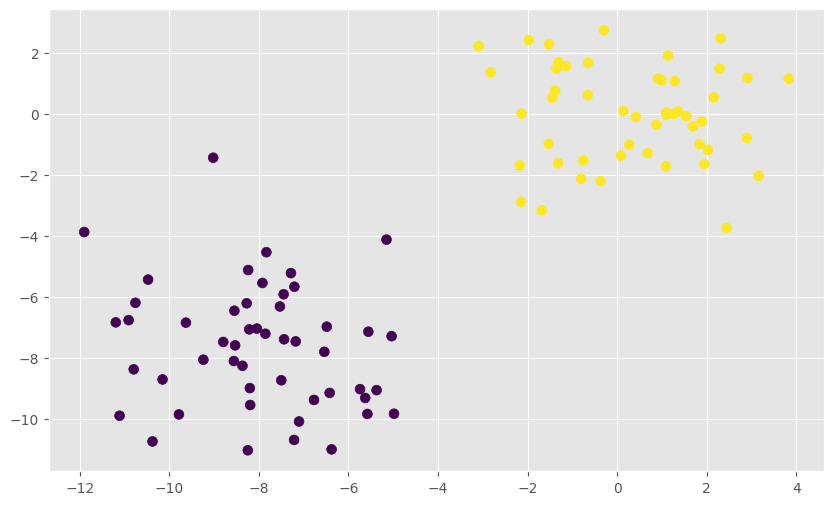

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0],X[:,1],c=y, s=50);

In [6]:
import numpy as np
from sklearn import model_selection as ms
X_train , X_test, y_train, y_test = ms.train_test_split(X.astype(np.float32), y, test_size=0.1)

In [7]:
import cv2
model_norm = cv2.ml.NormalBayesClassifier_create()

In [8]:
model_norm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)


True

In [9]:
_, y_pred = model_norm.predict(X_test)

In [10]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

1.0

In [11]:
def plot_decision_boundary(model, X_test, y_test):

    h= 0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:,0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    X_hypo = np.column_stack((xx.ravel().astype(np.float32),
                              yy.ravel().astype(np.float32)))

    ret = model.predict(X_hypo)
    if isinstance(ret, tuple):
        zz = ret[1]
    else:
        zz = ret
    zz = zz.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha= 0.8)    
    plt.scatter(X_test[:, 0],X_test[:, 1], c=y_test, s=200)

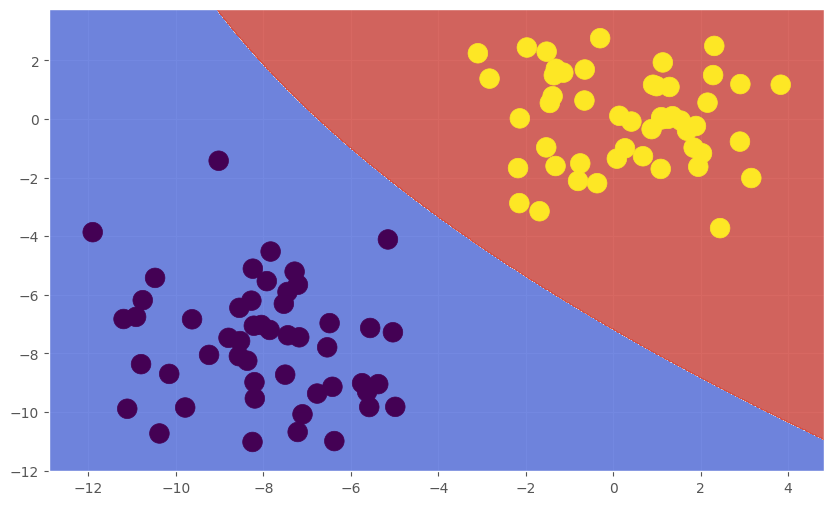

In [12]:
plt.figure(figsize=(10, 6 ))
plot_decision_boundary(model_norm, X, y)

In [13]:
ret, y_pred, y_proba = model_norm.predictProb(X_test)

In [14]:
y_proba.round(2)

array([[0.19, 0.  ],
       [0.  , 0.25],
       [0.  , 0.16],
       [0.25, 0.  ],
       [0.15, 0.  ],
       [0.  , 0.02],
       [0.  , 0.18],
       [0.02, 0.  ],
       [0.  , 0.1 ],
       [0.  , 0.24]], dtype=float32)

In [15]:
from sklearn import naive_bayes
model_naive = naive_bayes.GaussianNB()

In [16]:
model_naive.fit(X_train, y_train)

GaussianNB()

In [17]:
model_naive.score(X_test, y_test)

1.0

In [18]:
yprob = model_naive.predict_proba(X_test)
yprob.round(2)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

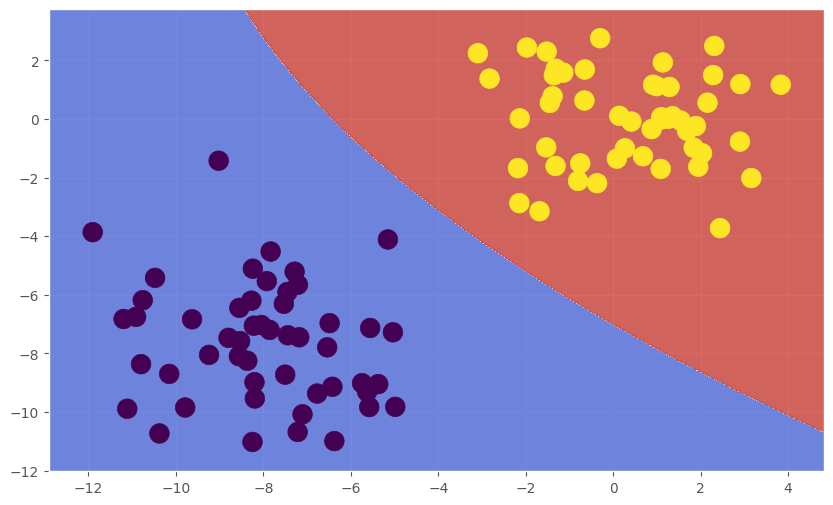

In [19]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(model_naive, X, y)

In [20]:
def plot_proba(model, X_test, y_test):

    h=0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx , yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))

    X_hypo = np.column_stack((xx.ravel().astype(np.float32),
                              yy.ravel().astype(np.float32)))
    if hasattr(model, 'predictProb'):
        _,_, y_proba = model.predictProb(X_hypo)
    else:
        y_proba = model.predict_proba(X_hypo)

    zz = y_proba[:, 1] - y_proba[:, 0]
    zz = zz.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap= plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

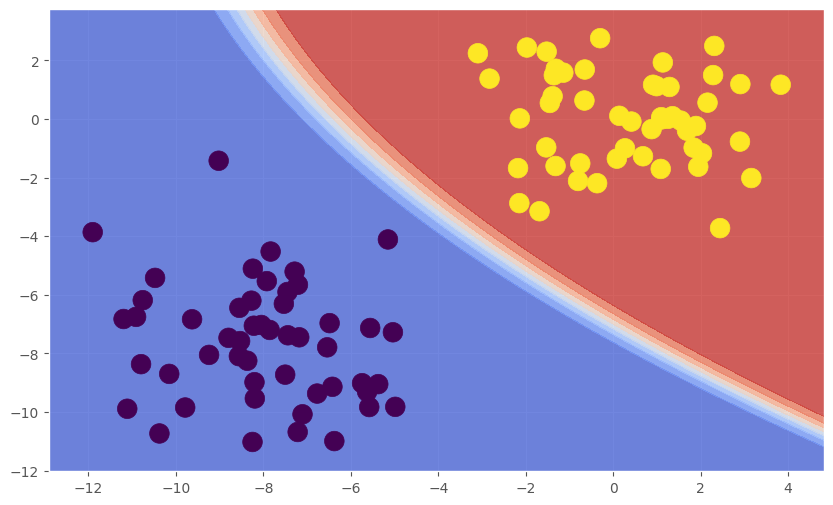

In [21]:
plt.figure(figsize=(10, 6))
plot_proba(model_naive, X, y)